# Traffic Violation Analysis #

All the imports we need

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loaing traffic violation data form csv.

In [20]:
traffic_violation = pd.read_csv('./myPython3/trainFile/Traffic_Violations.csv')

/home/user/Documents/stackRoute/myPython3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Part 1: Bar Graph for violation type ##

counting and plotting the graph

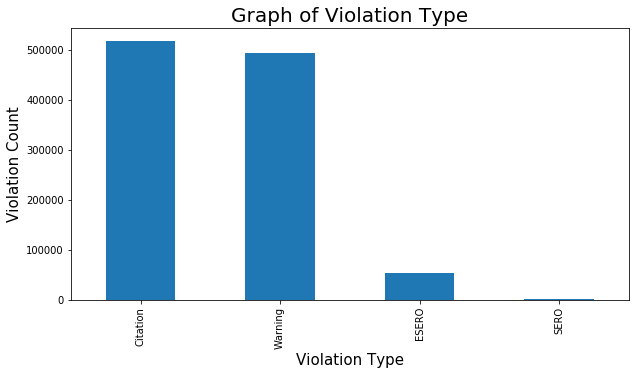

In [152]:
traffic_violation['Violation Type'].value_counts().plot(kind='bar', figsize = (10,5))
plt.xlabel('Violation Type', size = 15)
plt.ylabel('Violation Count' , size = 15)
plt.title('Graph of Violation Type' , size = 20)
plt.show()

## Part 2: Grouping by Location and Ploting violations between 2013 to 2015 ##

Converting the date given to year and adding it as a new column.

In [135]:
traffic_violation['violation_year'] = pd.to_datetime(traffic_violation['Date Of Stop']).dt.year

Getting all the data from year 2013 to 2015 in a new dataframe.

In [136]:
tv_year = traffic_violation[(traffic_violation.violation_year >= 2013) & (traffic_violation.violation_year<=2015)] 

Grouping the dataFrame according to Location and violation year and counting the violations respectively

In [137]:
temp = tv_year.groupby('Location').violation_year.value_counts().head(100).unstack()

Plotting the stats obtained.

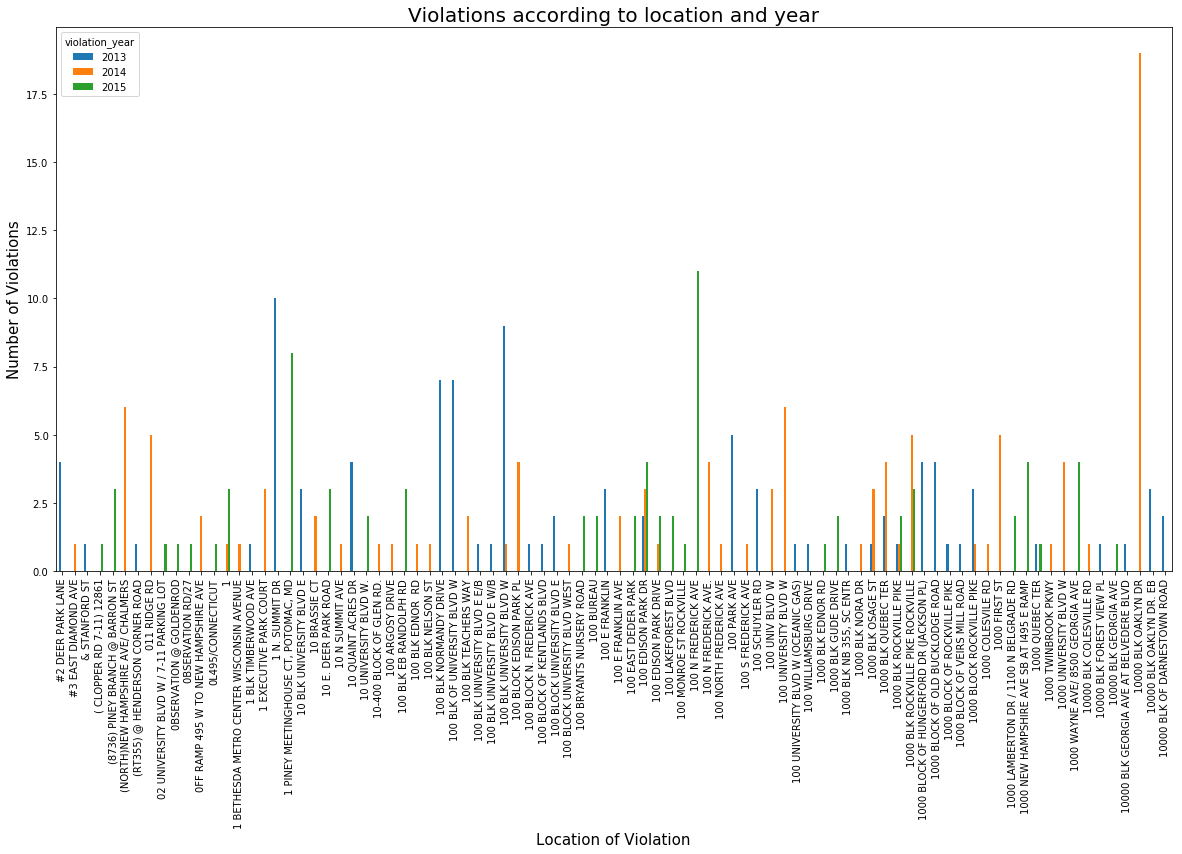

In [154]:
temp.plot(kind='bar', figsize = (20,10))
plt.xlabel('Location of Violation', size = 15)
plt.ylabel('Number of Violations', size = 15)
plt.title('Violations according to location and year', size = 20)
plt.show()

## Part 3: Aggregated Number of Violations first by District followed by Race ##

Calculating the number of violations per District followed by Race

In [143]:
district_to_race = traffic_violation.groupby('SubAgency').Race.value_counts().unstack()

Plotting the stats obtained in a stacked manner

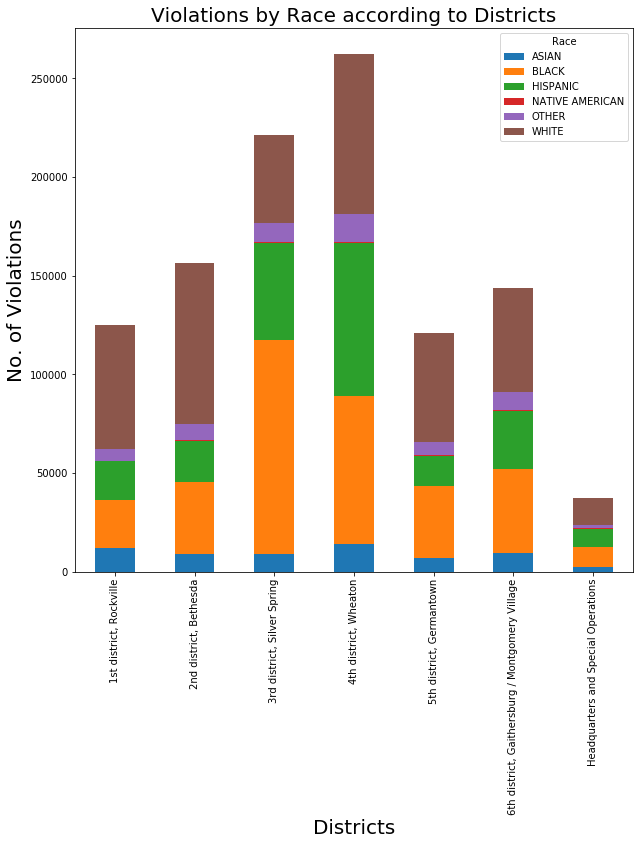

In [146]:
district_to_race.plot(kind='bar', stacked=True, figsize= (10,10))
plt.xlabel('Districts', size = 20)
plt.ylabel('No. of Violations', size= 20)
plt.title('Violations by Race according to Districts', size = 20)
plt.show()